In [43]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error


In [16]:
plt.style.use('ggplot')

def plot_history(history):
    msle = history.history['mean_squared_logarithmic_error']
    val_msle = history.history['val_mean_squared_logarithmic_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(msle) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, msle, 'b', label='Training MSLE')
    plt.plot(x, val_msle, 'r', label='Validation MSLE')
    plt.title('Training and validation MSLE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [2]:
dpath = '../data/'
df = pd.read_csv(dpath + 'pipeline_output.csv')
target_name = "KWH"

train_data, test_data = train_test_split(df, test_size=0.3)
X_train, y_train = train_data.drop(target_name, axis=1), train_data[target_name]
X_test, y_test = test_data.drop(target_name, axis=1), test_data[target_name]

In [3]:
def scale_datasets(X_train, X_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    sc = StandardScaler()

    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),
                                columns = X_train.columns)

    X_test_scaled = pd.DataFrame(sc.transform(X_test),
                                columns = X_test.columns)
                                
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

In [4]:
dfy_train = pd.DataFrame(y_train)
dfy_test = pd.DataFrame(y_test)

target_scaler = MinMaxScaler()
target_scaler.fit(dfy_train)

y_train_scaled = target_scaler.transform(dfy_train)
y_test_scaled = target_scaler.transform(dfy_test)
# it worked 


In [5]:
print(X_test_scaled.shape)
print(y_test.shape)
print(y_test_scaled.shape)

print(X_train_scaled.shape)
print(y_train.shape)
print(y_train_scaled.shape)

(3625, 485)
(3625,)
(3625, 1)
(8458, 485)
(8458,)
(8458, 1)


In [8]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
#learning_rate = 0.01
learning_rate = 0.001


# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
  
# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 160)               77760     
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 480)               77280     
_________________________________________________________________
dropout_3 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               123136    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 278,433
Trainable params: 278,433
Non-trainable params: 0
________________________________________________

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train_scaled, y_train, # am using the scaled versions
                    epochs=30,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    batch_size=64,
                    callbacks=[callback]
                    )



2022-08-03 11:00:08.232572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
133/133 [==============================] - 1s 5ms/step - loss: 13.6613 - mean_squared_logarithmic_error: 13.5880 - val_loss: 2.0148 - val_mean_squared_logarithmic_error: 2.0202
Epoch 2/30
133/133 [==============================] - 1s 4ms/step - loss: 0.9222 - mean_squared_logarithmic_error: 0.9182 - val_loss: 0.5073 - val_mean_squared_logarithmic_error: 0.5102
Epoch 3/30
133/133 [==============================] - 1s 4ms/step - loss: 0.3279 - mean_squared_logarithmic_error: 0.3270 - val_loss: 0.3106 - val_mean_squared_logarithmic_error: 0.3125
Epoch 4/30
133/133 [==============================] - 0s 4ms/step - loss: 0.2284 - mean_squared_logarithmic_error: 0.2287 - val_loss: 0.2491 - val_mean_squared_logarithmic_error: 0.2506
Epoch 5/30
133/133 [==============================] - 0s 4ms/step - loss: 0.1863 - mean_squared_logarithmic_error: 0.1853 - val_loss: 0.2133 - val_mean_squared_logarithmic_error: 0.2145
Epoch 6/30
133/133 [==============================] - 1s 4ms/step - 

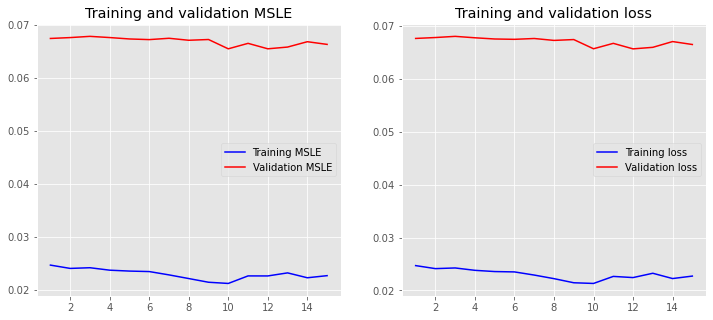

In [32]:
plt.style.use('ggplot')

def plot_history(history):
    msle = history.history['mean_squared_logarithmic_error']
    val_msle = history.history['val_mean_squared_logarithmic_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(msle) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, msle, 'b', label='Training MSLE')
    plt.plot(x, val_msle, 'r', label='Validation MSLE')
    plt.title('Training and validation MSLE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [33]:
#prediect no scaling
prediction = model.predict(X_test_scaled)
print(type(y_test))
print(type(prediction))

pred_frame = pd.DataFrame(y_test.copy())
pred_frame['prediction'] = prediction

print("R2 Score is:", r2_score(y_test, prediction))
pred_frame

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
R2 Score is: 0.8796600065632126


,KWH,prediction
3101,3885,4372.098145
10252,3994,5143.009277
4865,11123,12753.587891
8978,11588,12981.796875
7365,4202,8144.296387
...,...,...
8077,10379,11617.164062
3969,4581,4783.013672
3399,13485,15075.853516
1823,20692,20701.935547


# Param Play

In [60]:
hidden_units1 = 160
hidden_units1_1 = 320
hidden_units2 = 480
hidden_units2_2 = 960
#hidden_units2 = 520
#hidden_units2 = 960
hidden_units3 = 256
#learning_rate = 0.01
learning_rate = 0.001


# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units1_1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),    
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2_2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
  
# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle])
  
#model.summary()

In [61]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train_scaled, y_train, # am using the scaled versions
                    epochs=60,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    batch_size=64,
                    callbacks=[callback]
                    )

Epoch 1/60
133/133 [==============================] - 4s 22ms/step - loss: 4.3622 - mean_squared_logarithmic_error: 4.3359 - val_loss: 0.1819 - val_mean_squared_logarithmic_error: 0.1821
Epoch 2/60
133/133 [==============================] - 2s 18ms/step - loss: 0.1491 - mean_squared_logarithmic_error: 0.1495 - val_loss: 0.1333 - val_mean_squared_logarithmic_error: 0.1336
Epoch 3/60
133/133 [==============================] - 2s 16ms/step - loss: 0.1069 - mean_squared_logarithmic_error: 0.1066 - val_loss: 0.1112 - val_mean_squared_logarithmic_error: 0.1115
Epoch 4/60
133/133 [==============================] - 2s 15ms/step - loss: 0.0816 - mean_squared_logarithmic_error: 0.0818 - val_loss: 0.0972 - val_mean_squared_logarithmic_error: 0.0975
Epoch 5/60
133/133 [==============================] - 2s 18ms/step - loss: 0.0665 - mean_squared_logarithmic_error: 0.0663 - val_loss: 0.0879 - val_mean_squared_logarithmic_error: 0.0882
Epoch 6/60
133/133 [==============================] - 2s 15ms/ste

In [62]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 160)               77760     
_________________________________________________________________
dropout_23 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 320)               51520     
_________________________________________________________________
dropout_24 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 480)               154080    
_________________________________________________________________
dropout_25 (Dropout)         (None, 480)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 960)             

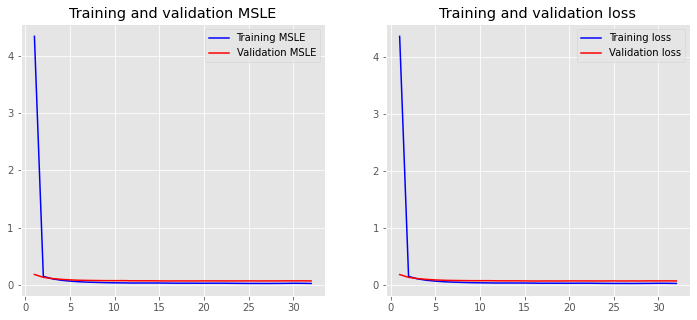

In [63]:
plot_history(history)

In [64]:
#prediect no scaling
prediction = model.predict(X_test_scaled)

pred_frame = pd.DataFrame(y_test.copy())
pred_frame['prediction'] = prediction

print("R2 is:" + "  ", "{:.5f}".format(r2_score(y_test, prediction)))
print("MSLE is:", "{:.5f}".format(mean_squared_log_error(y_test, prediction)))
print("RMSE is:", "{:.5f}".format(mean_squared_error(y_test, prediction, squared=False)))
pred_frame.head(5)

#"{:.2f}".format(float)

R2 is:   0.88093
MSLE is: 0.06961
RMSE is: 2652.19226


,KWH,prediction
8764,17890,21387.246094
2214,9309,7957.127441
10995,7479,7515.579102
8992,21440,21539.445312
11822,4415,5336.866699


In [68]:
model_path = "../output/models/"
filename = 'NN_model1'
tf.keras.models.save_model(model, model_path + filename)

INFO:tensorflow:Assets written to: ../output/models/NN_model1/assets
